## The geometrical efficiency of the detector calculated from the previous part

In [1]:
import math
import numpy
import pandas as pd
from scipy import exp, pi
from scipy import integrate
from matplotlib import pyplot as plt
from operator import add 


mu=0.29433
R=2.54
t=0.05
h=5.1
z=1
i=0

x_positions=[]
y_positions=[]
r_initial=[]
r_final=[]
h_initial=[]
h_final=[]
geom_eff=[]


for k in numpy.arange(-2, 2.2, 0.2): 
      x_positions.append(k)

        
        
for j in numpy.arange(-2, 2.2, 0.2):
        
                r_s=math.sqrt(i**2+j**2+z**2)
                r_i=abs(i)-(R+t)
                r_initial.append(r_i)
                r_f=abs(i)+(R+t)
                r_final.append(r_f)
                h_i=abs(j)-h/2
                h_initial.append(h_i)
                h_f=abs(j)+h/2
                h_final.append(h_f)
                geometrical_efficiency=(z/r_s)*(1/(4*math.pi))*((numpy.arctan(r_f*h_f/r_s*math.sqrt(r_s**2+r_f**2+h_f**2))+numpy.arctan(r_i*h_i/r_s*math.sqrt(r_s**2+r_i**2+h_i**2)))-(numpy.arctan(r_f*h_i/r_s*math.sqrt(r_s**2+r_f**2+h_i**2))+numpy.arctan(r_i*h_f/r_s*math.sqrt(r_s**2+r_i**2+h_f**2))))
                geom_eff.append(geometrical_efficiency)

                
with open("axial_geo_twoin.csv", "w") as out_file:
     for number in geom_eff:
        print(number)
        outstring=str(number)
        outstring+='\n'
        out_file.write(outstring)
        
        
data=pd.read_csv("axial_geo_twoin.csv",names=['Calculation'])
data.to_csv("axial_geo_twoinupdated.csv")


                
print("These are the values of r_i:")                
for i in r_initial: 
    print(i)
print("These are the values of r_f:")
for i in r_final:
    print(i)
    
    
plt.scatter(x_positions,geom_eff, color="none", edgecolor="red", label="Experimental")
plt.xlabel("Diagonal position of the source (x=y)(%)")
plt.ylabel("The geometrical efficiency (%)")
plt.savefig("axitwo_geo.pdf", bbox_inches='tight')
plt.show()


0.19096444159985498
0.21683092019058292
0.24315222717914584
0.2715677437105981
0.3030319154837422
0.33795530484692543
0.37591857515135446
0.41501622639412655
0.4510442333133822
0.4774091483481806
0.487221773167033
0.4774091483481807
0.4510442333133824
0.4150162263941266
0.3759185751513547
0.3379553048469256
0.3030319154837423
0.2715677437105982
0.24315222717914595
0.21683092019058303
0.19096444159985512
These are the values of r_i:
-2.59
-2.59
-2.59
-2.59
-2.59
-2.59
-2.59
-2.59
-2.59
-2.59
-2.59
-2.59
-2.59
-2.59
-2.59
-2.59
-2.59
-2.59
-2.59
-2.59
-2.59
These are the values of r_f:
2.59
2.59
2.59
2.59
2.59
2.59
2.59
2.59
2.59
2.59
2.59
2.59
2.59
2.59
2.59
2.59
2.59
2.59
2.59
2.59
2.59


<Figure size 640x480 with 1 Axes>

# Calculation of intrinsic detection efficiency of a cylindrical NaI(Tl) detector

### Calculation of survival paobablity of photon inside the layers

/home/shahin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead


0.4654159148625232
0.4502213236155486
0.437372426112706
0.42664537672626013
0.4178231668043687
0.41070758390289264
0.4051259929924086
0.4009349487758769
0.39802200232402635
0.3963065344112017
0.3957400976898542
0.39630653441120156
0.39802200232402635
0.4009349487758765
0.4051259929924086
0.41070758390289225
0.41782316680436876
0.42664537672626024
0.43737242611270605
0.4502213236155479
0.46541591486252326


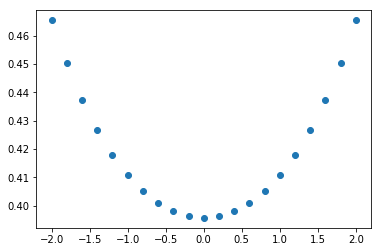

In [2]:
import math
import numpy
from scipy import exp, pi
from scipy import integrate
from matplotlib import pyplot as plt
from operator import add 


mu=0.20979
R=2.54
t=0.05
h=5.1
z=1
i=0



integral1=[]
integral2=[]
integral_survive=[]
y_positions=[]
products=[]



for j in numpy.arange(-2, 2.2, 0.2):
                    y_positions.append(j) 
        
                    psi=numpy.arcsin(abs(i)/(R+t))
                
                    alpha=numpy.arcsin(abs(i)/R)
                 
                    t_prime=math.sqrt(R**2+(R+t)**2-2*R*(R+t)*math.cos(psi-alpha)) 
                
                    D_s= math.sqrt(i**2 +(z+t+R)**2)
              
                    
                    
   
             
#Definition of the limits of the intigration for the left side of the cylinder           
            
                    def bounds_Phi():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta(Phi):
                        return [0.0,numpy.arctan((abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R+t)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2)))]
                    def f(r, theta, Phi):
                        return exp(-mu*r)*r**2*math.sin(theta)
                    area=integrate.nquad(f, [bounds_r, bounds_theta, bounds_Phi])
                    integral1.append(area[0])
                   
                    
#Definition of the limits of the intigration for the right side of the cylinder   
                    def bounds_Phi1():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta1(Phi):
                        return [0.0,numpy.arctan((-abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r1(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R+t)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2)))]
                    def f1(r, theta, Phi):
                        return exp(-mu*r)*r**2*math.sin(theta)
                    area1=integrate.nquad(f, [bounds_r1, bounds_theta1, bounds_Phi1])
                    integral2.append(area1[0])
                   
                    
integral1=numpy.asarray(integral1)
integral2=numpy.asarray(integral2)
sum_survive=zip(integral1,integral2)
integral_survive = [sum(k) for k in sum_survive]
for number in integral_survive:
    print(number)

plt.plot(y_positions,integral_survive, 'o')
plt.show()

### Calculation of the interaction probability of photon inside the NaI(Tl) crystal

In [3]:
import math
import numpy
import pandas as pd
from scipy import exp, pi
from scipy import integrate
from matplotlib import pyplot as plt
from operator import add 

mu=0.29433
R=2.54
t=0.05
h=5.1
z=1
average=0
suma=0
i=0



integral1=[]
integral2=[]
integral_interact=[]
x_positions=[]
y_positions=[]
products=[]


for j in numpy.arange(-2, 2.2, 0.2):
        
                    y_positions.append(j) 
        
                    psi=numpy.arcsin(abs(i)/(R+t))
                 
                    alpha=numpy.arcsin(abs(i)/R)
                
                    t_prime=math.sqrt(R**2+(R+t)**2-2*R*(R+t)*math.cos(psi-alpha)) 
                
                    D_s= math.sqrt(i**2 +(z+t+R)**2)
                 
                    
                    
   
             
#Determination of the limits of the integral            
            
                    def bounds_Phi():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta(Phi):
                        return [0.0,numpy.arctan((abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))+(math.sqrt((R)**2-(math.sin(Phi))**2*(D_s)**2)))]
                    def f(r, theta, Phi):
                        return (1-exp(-mu*r))*r**2*math.sin(theta)
                    area=integrate.nquad(f, [bounds_r, bounds_theta, bounds_Phi])
                    integral1.append(area[0])
                  
    
                    def bounds_Phi1():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta1(Phi):
                        return [0.0,numpy.arctan((-abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r1(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))+(math.sqrt((R)**2-(math.sin(Phi))**2*(D_s)**2)))]
                    def f1(r, theta, Phi):
                        return (1-exp(-mu*r))*r**2*math.sin(theta)
                    area1=integrate.nquad(f, [bounds_r1, bounds_theta1, bounds_Phi1])
                    integral2.append(area1[0])
                     
                    
                   
integral1=numpy.asarray(integral1)
integral2=numpy.asarray(integral2)
sum_interact=zip(integral1,integral2)
integral_interact = [sum(k) for k in sum_interact]
for number in integral_interact:
    print(number)

/home/shahin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead


345.87127712215175
318.46876623957644
293.7352125155504
271.75562074314104
252.60011973339638
236.32273588324244
222.96303917975962
212.54880245115032
205.09866402407997
200.6243397576368
199.13222308696646
200.62433975763665
205.09866402407997
212.54880245115007
222.96303917975968
236.322735883242
252.60011973339613
271.75562074314104
293.7352125155504
318.46876623957644
345.8712771221518


### Calculation of intrinsic efficiency of the detector

-----------------------------
Thease are the products
160.97399686647555
143.38142946659283
128.47168253265755
115.94327918943608
105.54218196217039
97.05953987592794
90.32812264830542
85.21824322312592
81.63378092884706
79.50873680788452
78.80460541763395
79.50873680788442
81.63378092884706
85.21824322312574
90.32812264830544
97.05953987592765
105.54218196217029
115.94327918943611
128.47168253265758
143.3814294665926
160.9739968664756
THIS IS COEFFICIENT1
[0.5681, 0.59309, 0.6208, 0.6488, 0.6785, 0.7141, 0.7606, 0.8217, 0.8957, 0.9669]
These are the elements of products: 
91.44932761984477
85.03809200234154
79.75522051627381
75.22399953810614
71.61037046133261
69.31021742540014
68.70357008630111
70.02383045644257
73.11937757796832
76.87699761954354
78.80460541763395
76.87699761954345
73.11937757796832
70.02383045644243
68.70357008630113
69.31021742539994
71.61037046133254
75.22399953810616
79.75522051627382
85.03809200234141
91.4493276198448
This is the end of the elements of products

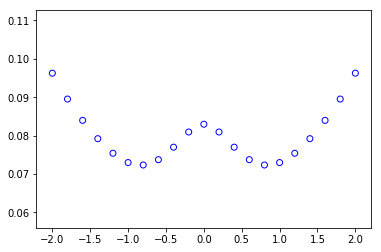

In [4]:
integral_survive=numpy.asarray(integral_survive)
integral_interact=numpy.asarray(integral_interact)
for num1 , num2 in zip(integral_survive,integral_interact):
    total_num=(num1*num2)
    products.append(total_num)
print("-----------------------------")
print("Thease are the products")
for i in products:
    print(i)
    
    
products1=[]   


First_sublist=products[0:10]
Second_sublist=products[11:21]

Coefficient1=[0.5681, 0.59309, 0.6208, 0.6488, 0.6785, 0.7141, 0.7606, 0.8217, 0.8957, 0.9669]
Coefficient1 = [x * 1 for x in Coefficient1]
def Reverse(lst): 
    return [ele for ele in reversed(lst)] 

Coefficient2=Reverse(Coefficient1)


print("THIS IS COEFFICIENT1")
print(Coefficient1)


for num1, num2 in zip(First_sublist,Coefficient1):
    list_one=(num1*num2)
    products1.append(list_one)
    
    
products2=[i*1 for i in products[10:11]]
for number in products2:
     products1.append(number)
        

for num1, num2 in zip(Second_sublist,Coefficient2):
    list_two=(num1*num2) 
    products1.append(list_two)
    



    
print("These are the elements of products: ")
for i in products1:
    print(i)
print("This is the end of the elements of products")


for number in products1:
    average+=number/21
for number in products:
    suma+=(number-average)*(number-average)
Sigma=math.sqrt(((suma))/21)
er=Sigma/(math.sqrt(21)) 


intrinsic_eff=[]
for i in products1:
    intrinsic_eff.append(i/950)
    

with open("axial_intr_twoin.csv", "w") as out_file:
     for number in intrinsic_eff:
        print(number)
        outstring=str(number)
        outstring+='\n'
        out_file.write(outstring)

data=pd.read_csv("axial_intr_twoin.csv",names=['Calculation'])
data.to_csv("axial_intr_twoinupdated.csv")

    
plt.scatter(y_positions, intrinsic_eff, color="none", edgecolor="blue")
#plt.xlim(-1.9,1.9)
#plt.errorbar(x_positions, products1, yerr=er, capsize=3,ls='none')
#plt.ylim(0.022,0.043)
plt.savefig("axitwo_intr.pdf", bbox_inches='tight')
plt.show()

### Calculation of absolute detection efficiency of the detector

0.018382705035374577
0.01940935551591491
0.020413325787048298
0.021503591397316377
0.022842344978313698
0.024656584904218726
0.027186261236477403
0.030590553551257796
0.0347158669473752
0.03863345469590673
0.04041612587927157
0.038633454695906684
0.034715866947375204
0.030590553551257737
0.027186261236477428
0.024656584904218664
0.02284234497831368
0.02150359139731639
0.020413325787048308
0.01940935551591489
0.018382705035374602


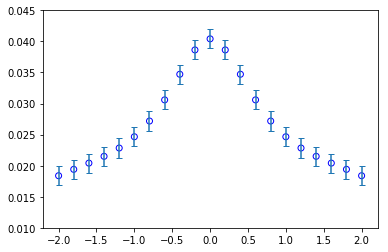

In [5]:
import math
import numpy
import pandas as pd
from scipy import exp, pi
from scipy import integrate
from matplotlib import pyplot as plt
from operator import add 

mu=0.29433
R=2.54
t=0.05
h=5.1
integral1=[]
integral2=[]
integral_interact=[]
x_positions=[]
y_positions=[]
products=[]
z=1
average=0
suma=0

for i in numpy.arange(-2, 2.2, 0.2):
    x_positions.append(i) 
    for j in numpy.arange(-2, 2.2, 0.2):
        y_positions.append(j) 
        

                    
integral1=numpy.asarray(integral1)
integral2=numpy.asarray(integral2)
sum_interact=zip(integral1,integral2)
integral_interact = [sum(k) for k in sum_interact]
for number in integral_interact:
    print(number)


integral_survive=numpy.asarray(integral_survive)
integral_interact=numpy.asarray(integral_interact)
for num1 , num2 in zip(geom_eff,intrinsic_eff):
    total_num=(num1*num2)
    products.append(total_num)
for number in products:
    average+=number/21
for number in products:
    suma+=(number-average)*(number-average)
Sigma=math.sqrt(((suma))/21)
er=Sigma/(math.sqrt(21)) 

with open("axial_total_twoin.csv", "w") as out_file:
     for number in products:
        print(number)
        outstring=str(number)
        outstring+='\n'
        out_file.write(outstring)
        
data=pd.read_csv("axial_total_twoin.csv",names=['Calculation'])
data.to_csv("axial_total_twoinupdated.csv")
    
plt.scatter(x_positions, products, color="none", edgecolor="blue")
plt.errorbar(x_positions, products, yerr=er, capsize=3,ls='none')
plt.ylim(0.01,0.045)
plt.savefig("axitwo_total.pdf", bbox_inches='tight')
plt.show()